# Tarea Semanal 2, Facundo Ivan Carranza

#### Este notebook tiene como objetivo la comprension de sistemas lineales y su implementacion con diferentes señales de entrada. Ademas poder ver las diferencias de aplicar funciones directas como lfilter o realizar a partir de la respuesta al impulso haciendo la convolucion.

## Introduccion Teorica

### En este trabajo práctico analizamos sistemas lineales e invariantes en el tiempo (LTI). Un sistema se dice lineal cuando cumple con dos propiedades fundamentales: aditividad y homogeneidad. Esto significa que si le damos al sistema una combinación de señales de entrada, la salida será la misma combinación de las respuestas individuales a cada señal. Por eso podemos usar una herramienta muy poderosa llamada convolución, que nos permite calcular la salida de un sistema a partir de su respuesta al impulso.

### La respuesta al impulso es la reacción del sistema a una señal muy corta y concentrada (un “impulso”). Conocer esta respuesta nos permite predecir cómo reaccionará el sistema a cualquier otra señal. Esto es muy útil porque, en lugar de analizar cada señal de entrada complicada directamente, podemos descomponerla en impulsos y usar la convolución para calcular la salida de manera sencilla.

### En nuestro trabajo, aplicamos estas ideas a diferentes señales de entrada, como señales causales y senoidales, y observamos cómo los sistemas modifican su amplitud y forma en función de sus características. También analizamos la potencia o energía de las señales de salida, que nos da información sobre cuánto “fuerza” tiene la señal después de pasar por el sistema.

## Analisis y desarrollo

##### Importamos nuestras librerias necesarias y defino las funciones que usare para generar mis señales.

In [1]:
#%% Importo librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.signal import convolve
from scipy.signal import dimpulse

In [2]:
#%%Defino mis funciones generadoras de señales

def funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genero una señal senoidal con los siguientes parámetros:
        vmax: Amplitud máxima (volts)
        dc: Valor medio (volts)
        ff: Frecuencia de la señal (Hz)
        ph: Fase (radianes)
        nn: Número de muestras
        fs: Frecuencia de muestreo (Hz)
    
    Retorno:
        tt: Vector de tiempo (nn x 1)
        xx: Señal senoidal (nn x 1)
    """
    tt = np.arange(0, nn/fs, 1/fs).reshape(-1, 1)
    "Utilice el reshape para asegurar la forma de columna"
    xx = (dc + vmax * np.sin(2 * np.pi * ff * tt + ph)).reshape(-1, 1)
    return tt, xx

def funcion_cuadrada(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genero una señal cuadrada con los siguientes parámetros:
        vmax: Amplitud máxima (volts)
        dc: Valor medio / Offset (volts)
        ff: Frecuencia de la señal (Hz)
        ph: Fase (radianes)
        nn: Número de muestras
        fs: Frecuencia de muestreo (Hz)
    
    Retorna:
        tt: Vector de tiempo (nn x 1)
        xx: Señal cuadrada (nn x 1)
    """
    tt = np.arange(0, nn/fs, 1/fs).reshape(-1, 1)
    # Generamos la senoidal base
    seno = np.sin(2 * np.pi * ff * tt + ph)
    # La señal cuadrada se obtiene al umbralizar la senoidal
    xx = dc + vmax * np.where(seno >= 0, 1, -1) 
    
    """
    Utilice la funcion np.where para tomar la senoidal creada arriba
    para transformarla en una señal cuadrada
    """
    
    return tt, xx.reshape(-1, 1)

In [3]:
#%% Genero mis señales de entrada

fs = 40000   # Frecuencia de muestreo
f  = 2000    # Frecuencia señal
nn = 200     # número de muestras
#Señal 1
tt, Sin_2k = funcion_sen(vmax=1, dc=0, ff=f, ph=0, nn=nn, fs=fs)
tm= 1/fs 
#Señal 2
tt_1, Sin_amp = funcion_sen(vmax=10, dc=0, ff=f, ph=np.pi/2, nn=nn, fs=fs)
#Señal 3
tt_2, portadora = funcion_sen(vmax=1, dc=0, ff=f/2, ph=0, nn=nn, fs=fs)
final = portadora * Sin_2k
#Señal 4
Sin_clip = np.clip(Sin_2k, -0.75, 0.75)
#Señal 5
tt_3 ,Cuadrada = funcion_cuadrada(vmax=1, dc=0, ff=f, ph=0, nn=nn, fs=fs)
#Señal 6 
fsr = 40000  # frecuencia de muestreo en Hz
tt_4 = np.arange(0, 0.03, 1/fsr)  # tiempo de 0 a 50 ms
t_start = 0.015  # tiempo de inicio del pulso (15 ms)
duracion = 0.01  # duración del pulso (10 ms)

# Pulso rectangular de 10 ms, desde t=0 hasta t=0.01
pulso = np.zeros_like(tt_4)           # inicializo todo en 0
pulso[(tt_4 >= t_start) & (tt_4 < t_start + duracion)] = 1
tm_6=1/fsr

##### Una vez generadas mis señales de entrada, empezamos utilizando la funcion lfilter para aplicar directamente el sistema lineal a cada señal de entrada, es importante definir bien los coeficientes que si son coeficientes de realimentacion deben tener el signo opuesto ya que la funcion los toma como si los hubieramos pasado al otro lado de la ecuacion. Tambien calculamos la potencia y la energia de la señal segun corresponda en cada caso

In [4]:
# Coeficientes de la ecuación en diferencias
b = [0.03, 0.05, 0.03]   # coeficientes de x
a = [1, -1.5, 0.5]       # coeficientes de y

# Aplicar el sistema LTI
Sin_2ky = lfilter(b, a, Sin_2k.flatten())   # flatten porque lfilter espera vector 1D
pot_1 = np.sum(Sin_2ky**2)/nn
Sin_ampy = lfilter(b, a, Sin_amp.flatten())
pot_2 = np.sum(Sin_ampy**2)/nn
final_y = lfilter(b, a, final.flatten())
pot_3= np.sum(final_y**2)/len(final_y)
Sin_clipy = lfilter(b, a, Sin_clip.flatten())
pot_4=np.sum(Sin_clipy**2)/len(Sin_clipy)
Cuadrada_y = lfilter(b, a, Cuadrada.flatten())
pot_5=np.sum(Cuadrada_y**2)/len(Cuadrada_y)
pulso_y = lfilter(b, a, pulso.flatten())
en_6=np.sum(pulso_y**2) * tm_6

##### Grafico las salidas del sistema con cada señal de entrada.

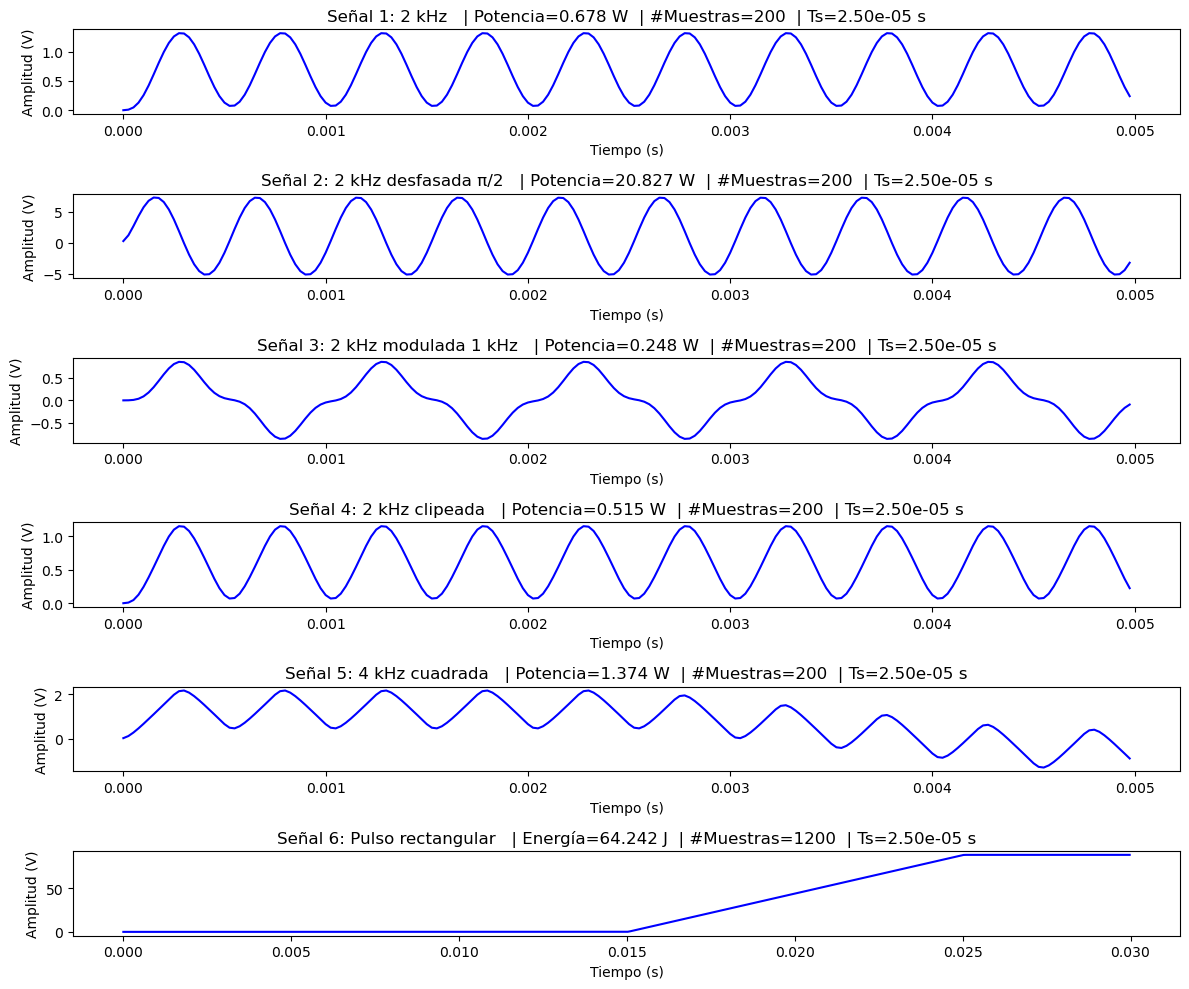

In [5]:
#%% Graficos
plt.figure(figsize=(12,10))

# Señal 1
plt.subplot(6,1,1)
plt.plot(tt, Sin_2ky, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 1: 2 kHz   | Potencia={pot_1:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

# Señal 2
plt.subplot(6,1,2)
plt.plot(tt, Sin_ampy, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 2: 2 kHz desfasada π/2   | Potencia={pot_2:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

# Señal 3
plt.subplot(6,1,3)
plt.plot(tt_2, final_y, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 3: 2 kHz modulada 1 kHz   | Potencia={pot_3:.3f} W  | #Muestras={len(final)}  | Ts={tm:.2e} s")

# Señal 4
plt.subplot(6,1,4)
plt.plot(tt, Sin_clipy, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 4: 2 kHz clipeada   | Potencia={pot_4:.3f} W  | #Muestras={len(Sin_clip)}  | Ts={tm:.2e} s")

# Señal 5
plt.subplot(6,1,5)
plt.plot(tt_3, Cuadrada_y, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 5: 4 kHz cuadrada   | Potencia={pot_5:.3f} W  | #Muestras={len(Cuadrada)}  | Ts={tm:.2e} s")

# Señal 6
plt.subplot(6,1,6)
plt.plot(tt_4, pulso_y, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 6: Pulso rectangular   | Energía={en_6:.3f} J  | #Muestras={len(pulso)}  | Ts={tm_6:.2e} s")

plt.tight_layout()
plt.show()

##### Una vez graficadas las salidas del sistema lineal, aplicamos la funcion dimpulse para poder obtener la respuesta al impulso y poder hacer una convolucion con cada una de las señales. De esta manera estaremos confirmando que podemos obtener la salida de un sistema lineal sabiendo su respuesta al impulso, Ademas graficamos la respuesta al impulso para poder ver que el numero de muestras utilizado es el correcto.

In [6]:
#%%Calculo de respuesta al impulso y graficos

n, h = dimpulse((b, a, 1), n=200)  # 200 muestras
h = np.squeeze(h)

Sin_conv = convolve(Sin_2k.flatten(), h, mode="full")
pot_1conv = np.sum(Sin_conv**2)/len(Sin_conv)
Sinamp_conv = convolve(Sin_amp.flatten(), h, mode="full")
pot_2conv = np.sum(Sinamp_conv**2)/len(Sinamp_conv)
final_conv = convolve(final.flatten(), h, mode="full")
pot_3conv = np.sum(final_conv**2)/len(final_conv)
Sinclip_conv = convolve(Sin_clip.flatten(), h, mode="full")
pot_4conv = np.sum(Sinclip_conv**2)/len(Sinclip_conv)
Cuadrada_conv = convolve(Cuadrada.flatten(), h, mode="full")
pot_5conv = np.sum(Cuadrada_conv**2)/len(Cuadrada_conv)
pulso_conv = convolve(pulso.flatten(), h, mode="full")
en_6conv=np.sum(pulso_conv**2) * tm_6

fs = 40000  # frecuencia de muestreo de ejemplo
N_x = len(Sin_2k)
N_h = len(h)
N_y = N_x + N_h - 1

tt_2 = np.arange(0, 200) / fs
tt = np.arange(0, N_y) / fs
tt_3 = np.arange(0, len(pulso_conv)) / fs

##### Ahora graficamos las convoluciones, cabe destacar que tuve que crear nuevos vectores de tiempo ya que la funcion convolve al usar en mode full nos da un vector de valor mayor que la entrada original

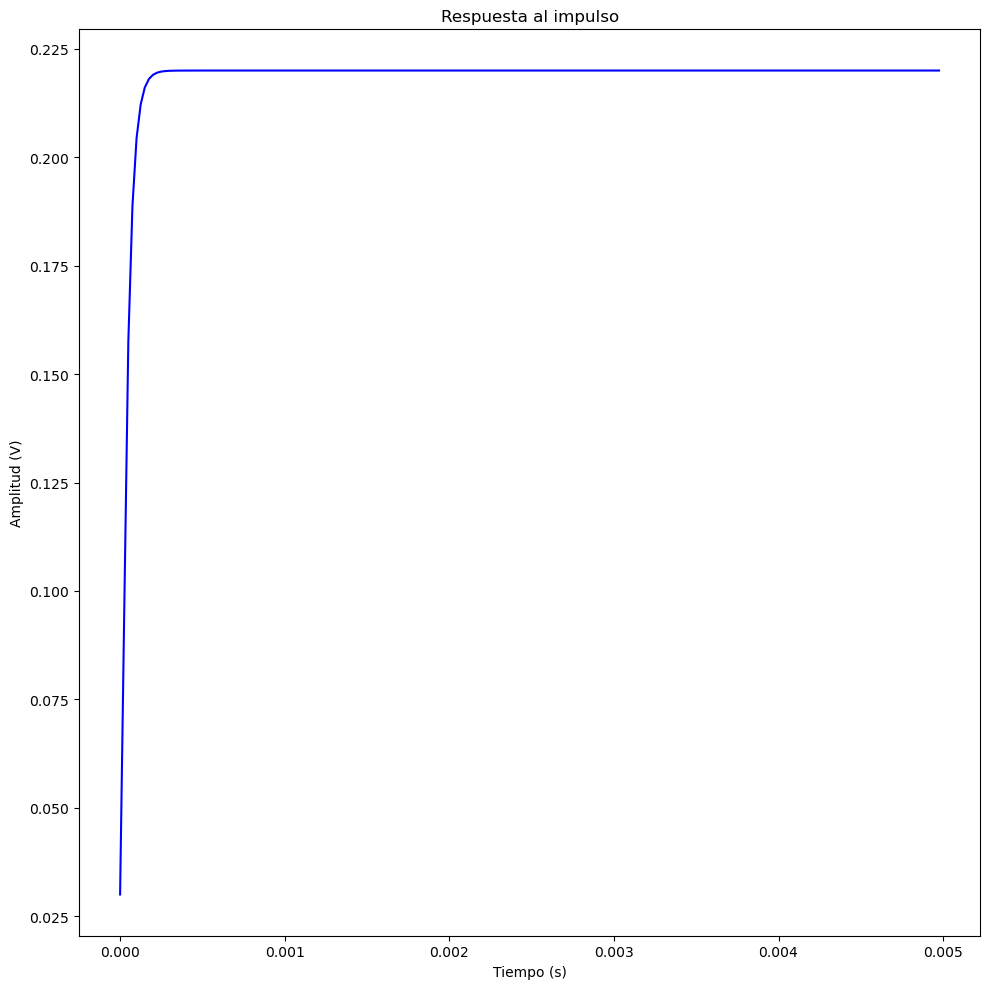

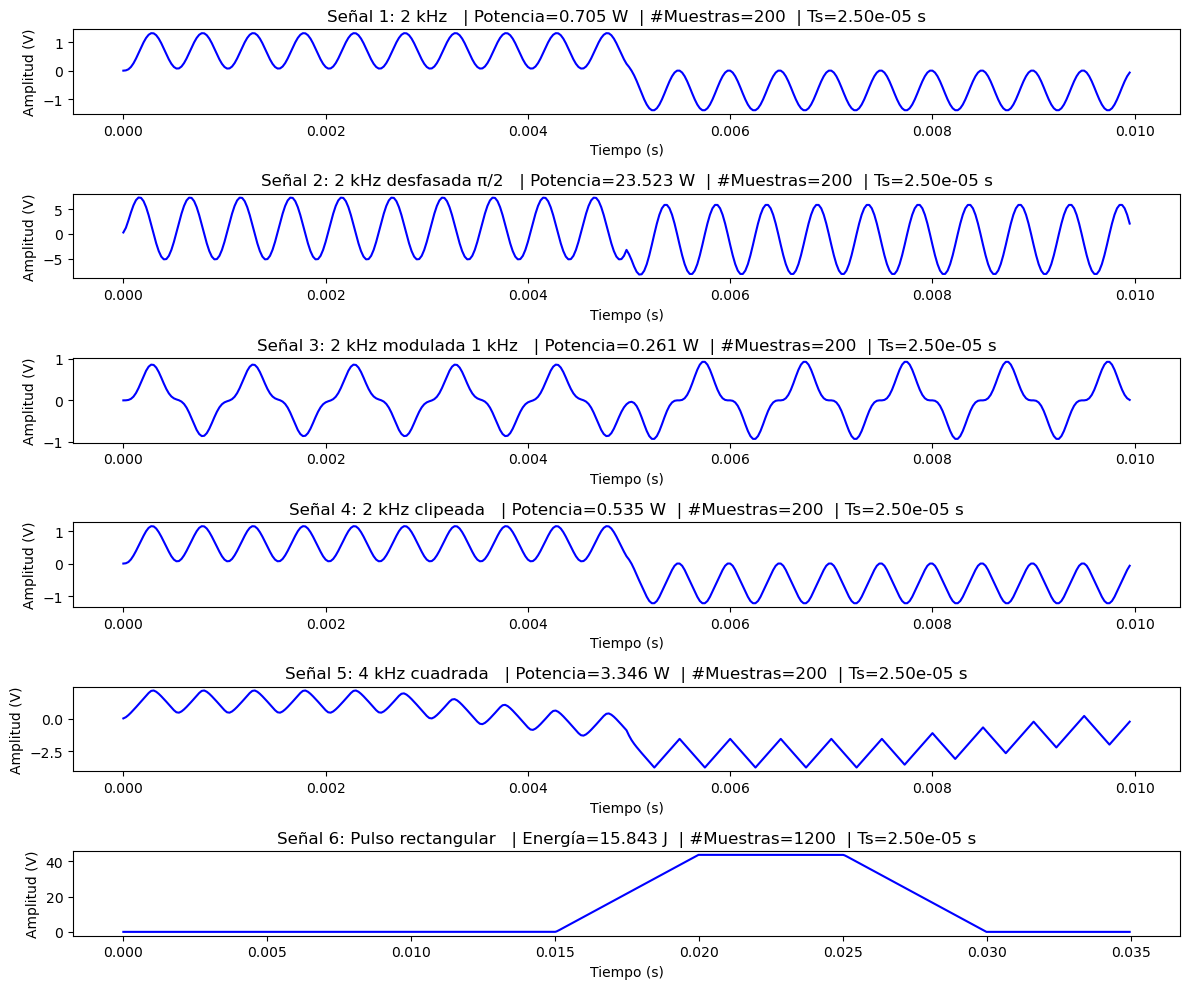

In [7]:
plt.figure(figsize=(10,10))

plt.plot(tt_2, h, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Respuesta al impulso")

plt.tight_layout()

plt.show()
plt.figure(figsize=(12,10))

# Señal 1
plt.subplot(6,1,1)
plt.plot(tt, Sin_conv, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 1: 2 kHz   | Potencia={pot_1conv:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

# Señal 2
plt.subplot(6,1,2)
plt.plot(tt, Sinamp_conv, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 2: 2 kHz desfasada π/2   | Potencia={pot_2conv:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

# Señal 3
plt.subplot(6,1,3)
plt.plot(tt, final_conv, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 3: 2 kHz modulada 1 kHz   | Potencia={pot_3conv:.3f} W  | #Muestras={len(final)}  | Ts={tm:.2e} s")

# Señal 4
plt.subplot(6,1,4)
plt.plot(tt, Sinclip_conv, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 4: 2 kHz clipeada   | Potencia={pot_4conv:.3f} W  | #Muestras={len(Sin_clip)}  | Ts={tm:.2e} s")

# Señal 5
plt.subplot(6,1,5)
plt.plot(tt, Cuadrada_conv, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 5: 4 kHz cuadrada   | Potencia={pot_5conv:.3f} W  | #Muestras={len(Cuadrada)}  | Ts={tm:.2e} s")

# Señal 6
plt.subplot(6,1,6)
plt.plot(tt_3, pulso_conv, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 6: Pulso rectangular   | Energía={en_6conv:.3f} J  | #Muestras={len(pulso)}  | Ts={tm_6:.2e} s")

plt.tight_layout()
plt.show()


##### Ahora haremos lo mismo pero con los nuevos sistemas lineales

In [8]:
#%%Calculo de respuesta al impulso
W=200
b2 = [1] + [0]*9 + [3]
a2 = [1]
u = np.zeros(W)
u[0] = 1   # impulso
r_1 = lfilter(b2, a2, u)

b3 = [1]
a3 = [1] + [0]*9 + [-3]
u = np.zeros(W)
u[0] = 1   # impulso
r_2 = lfilter(b3, a3, u)

tt_4 = np.arange(0, W) / fs

##### Creamos la respuesta al impulso y aplicamos lfilter para obtener la respuesta al impulso de cada sistema, ahora graficamos las respuestas al impulso y la convolucion.

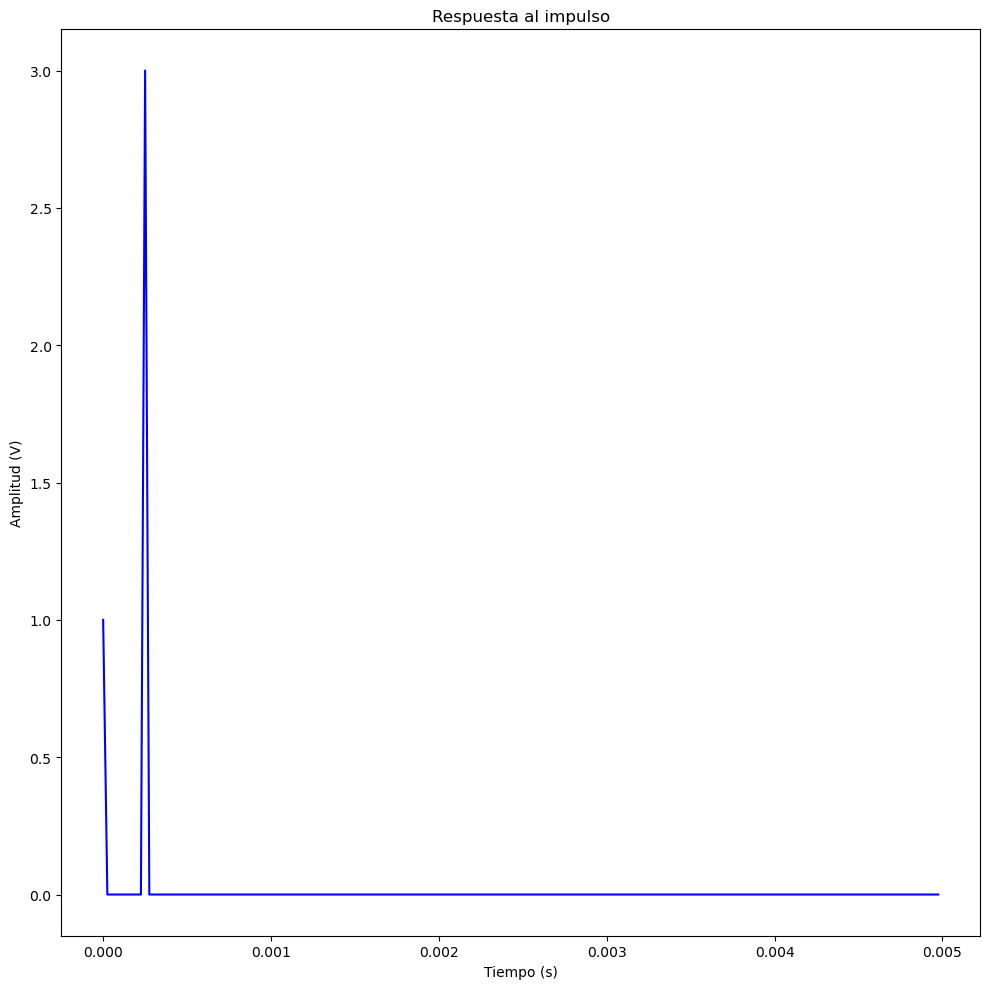

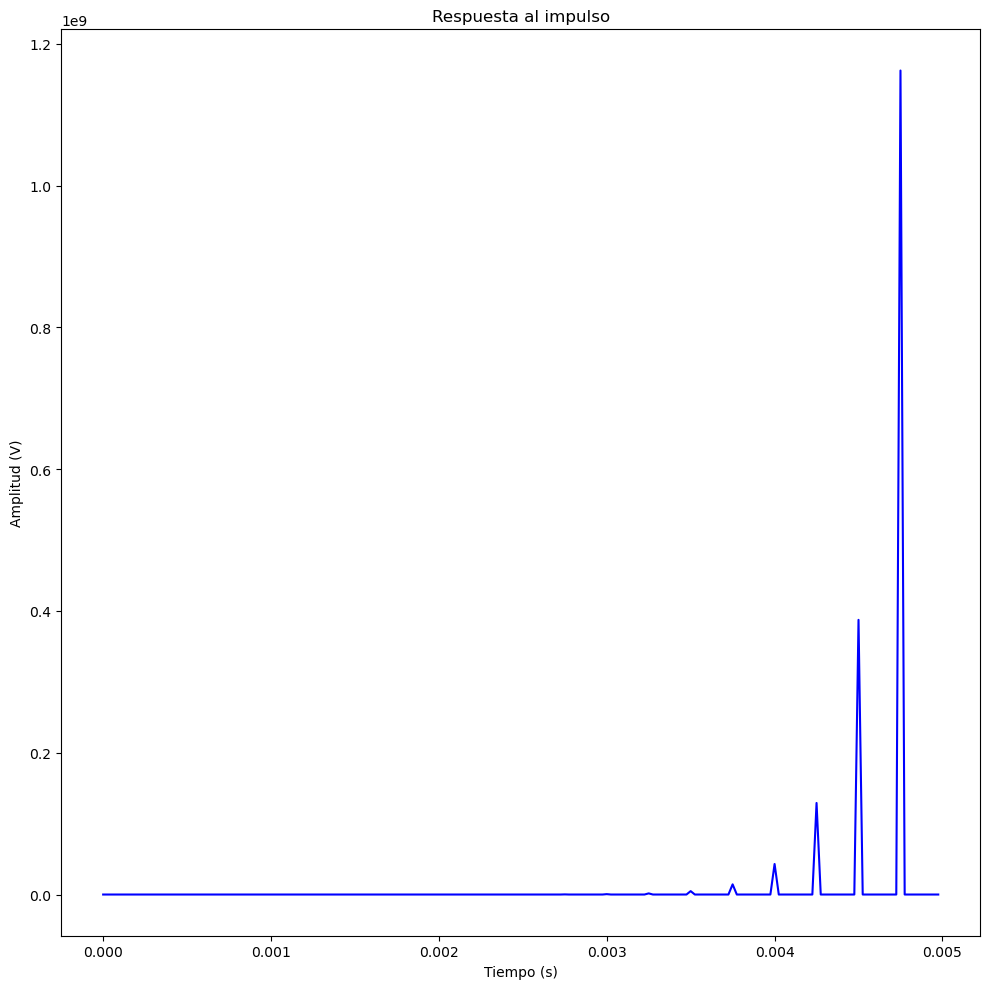

In [9]:
#%%Grafico las respuestas al impulso

plt.figure(figsize=(10,10))

plt.plot(tt_4, r_1, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Respuesta al impulso")

plt.tight_layout()

plt.figure(figsize=(10,10))

plt.plot(tt_4, r_2, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title("Respuesta al impulso")

plt.tight_layout()

In [10]:
#%%Hago convolucion de una señal senoidal con cada respuesta al impuslo

Sin_conv_2 = convolve(Sin_2k.flatten(), r_1, mode="full")
pot_7conv = np.sum(Sin_conv_2**2)/len(Sin_conv_2)
Sin_conv_3 = convolve(Sin_2k.flatten(), r_2, mode="full")
pot_8conv = np.sum(Sin_conv_3**2)/len(Sin_conv_3)
fs = 40000  # frecuencia de muestreo de ejemplo
N_x = len(Sin_2k)
N_h = len(r_1)
N_w = N_x + N_h - 1

tt_6 = np.arange(0, N_w) / fs

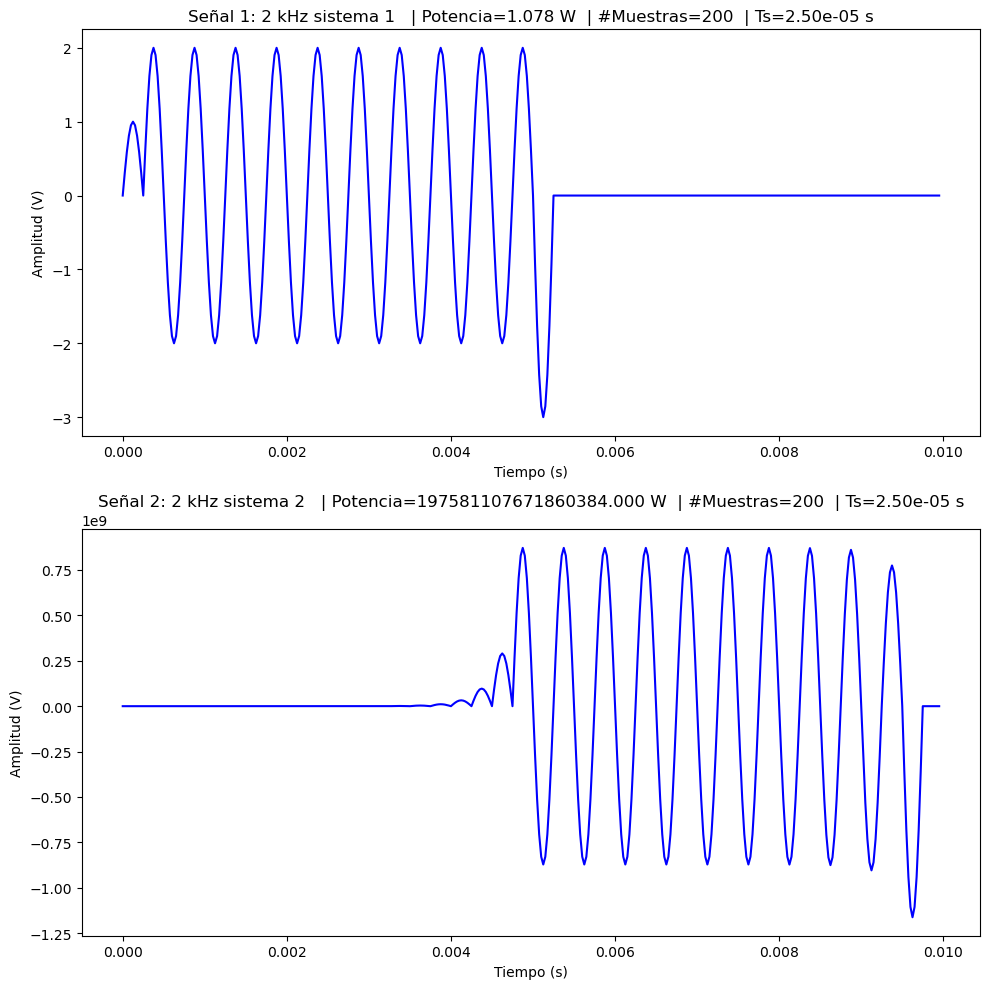

In [11]:
#%%Grafico la salida

plt.figure(figsize=(10,10))
# Señal 1
plt.subplot(2,1,1)
plt.plot(tt_6, Sin_conv_2, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 1: 2 kHz sistema 1   | Potencia={pot_7conv:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

# Señal 2
plt.subplot(2,1,2)
plt.plot(tt_6, Sin_conv_3, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 2: 2 kHz sistema 2   | Potencia={pot_8conv:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

plt.tight_layout()

##### Una vez graficado las convoluciones volvere a verificar pero esta ves usando lfilter y verificar si tenemos la misma respuesta

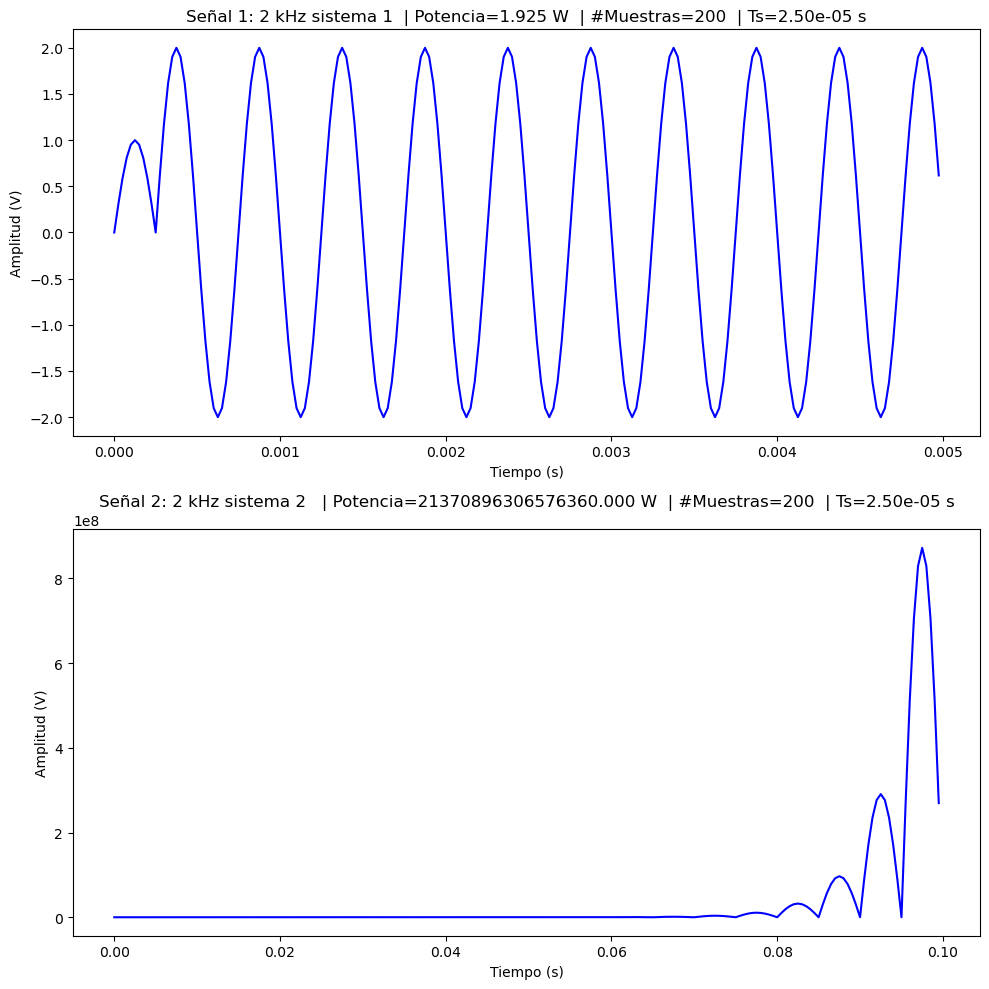

In [12]:
##Compruebo aplicando directamente el sistema
r_1y = lfilter(b2, a2, Sin_2k.flatten())
pot_9conv = np.sum(r_1y**2)/len(r_1y)
r_2y = lfilter(b3, a3, Sin_2k.flatten())
pot_10conv = np.sum(r_2y**2)/len(r_2y)
tt_7 = np.arange(0, len(r_1y)) / fs
tt_8 = np.arange(0, len(r_2y)) / f

plt.figure(figsize=(10,10))
# Señal 1
plt.subplot(2,1,1)
plt.plot(tt_7, r_1y, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 1: 2 kHz sistema 1  | Potencia={pot_9conv:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

# Señal 2
plt.subplot(2,1,2)
plt.plot(tt_8, r_2y, color='blue')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.title(f"Señal 2: 2 kHz sistema 2   | Potencia={pot_10conv:.3f} W  | #Muestras={nn}  | Ts={tm:.2e} s")

plt.tight_layout()

## Conclusiones

#### Despues de analizar los graficos con respecto al primer sistema puedo determinar que las salidas no son exactamente iguales. La salida al aplicar primero convolucion con la respuesta al impulso varia demasiado dependiendo de la cantidad de muestras que utilizo para mi respuesta al impulso, por eso es importante graficar la respuesta al impulso para poder determinar como se comporta con la cantidad de muestras que tengo. Ademas en el grafico hecho por convolucion la salida es mas grande ya que en la modalidad full de la funcion nos devuelve mayor cantidad de valores.
#### Con respecto a la primer respuesta al impulso nos determina que el sistema no es BIBO estable ya que su valor a n muy grande no es 0.
#### Pasando a los siguientes sistemas vemos que la respuesta al impulso es 0 en valores grandes en ambos casos, y con respecto a la respuesta vemos una discrepancia bastante grande con los resultados por convolucion y por el sistema lineal.

## Autoevaluacion del aprendizaje

#### Creo que es un trabajo donde termino con muchas dudas pero tambien pudiendo entender cosas que antes no captaba completamente. Pude ver directamente conceptos que solo tenia teoricamente como los de convolucion y tambien me sirvio para poder imaginarme la salida en el tiempo de un sistema lineal. Tambien pude comprender la diferencia entre sistemas FIR e IIR y como afectan a la estabilidad del sistema, ademas de otros problemas relacionados a la practica con señales como elegir correctamente la cantidad de muestras en una respuesta al impulso o problemas de codigo como utilizar diferentes vectores de tiempo para convoluciones, etc.